In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [79]:
acc_vel_loc_sinrangos = pd.read_parquet('../data/interim/Acc_vel_loc_sinrangos.parquet')

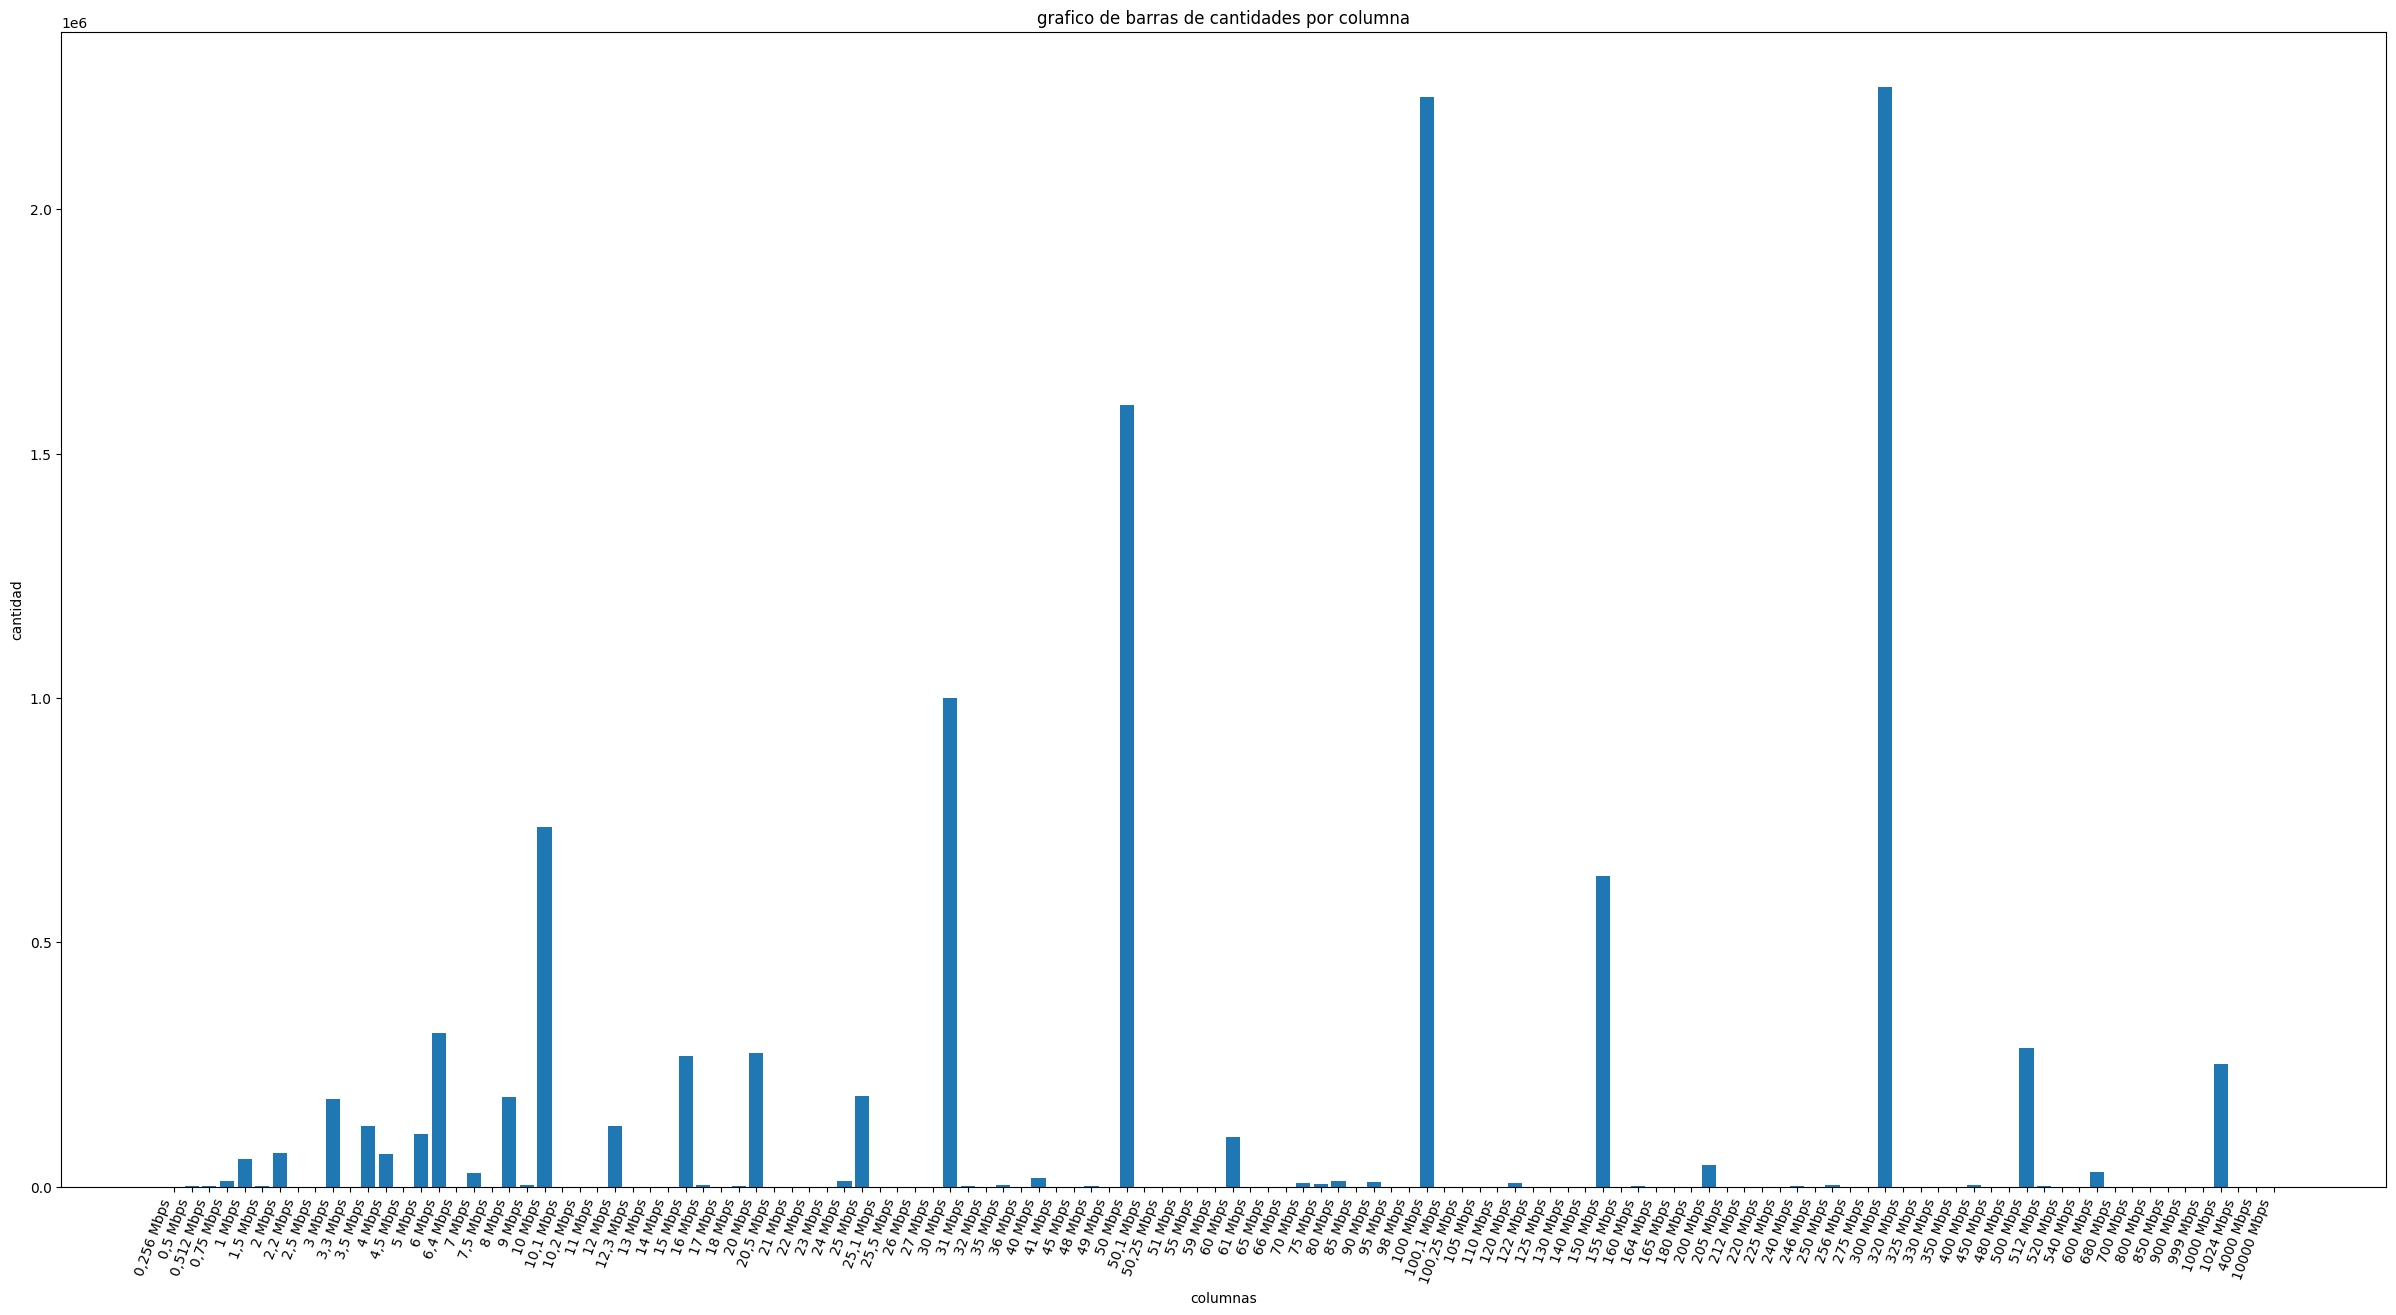

In [80]:
plt.figure(figsize=(30,15))
plt.bar(acc_vel_loc_sinrangos.columns[5:], [acc_vel_loc_sinrangos[col].sum() for col in acc_vel_loc_sinrangos.columns[5:]])
plt.xlabel('columnas')
plt.xticks(rotation=70, ha='right')
plt.ylabel('cantidad')
plt.title('grafico de barras de cantidades por columna')
plt.show()

Si bien no se alcanza a observar bien las velocidades, se pueden apreciar pilares donde se concentra la mayoria de datos, por lo que voy a seccionar en los 5 pilares mas grandes  
- **0.256mbps - 10mbps**
- **10mbps - 30mbps**
- **30mbps - 50mbps**
- **50mbps - 100mbps**
- **100mbps - 300mbps**
- **+ de 300mbps**

Voy a estar imprimiendo los rangos para despues copiarlos en la funcion pandas.Dataframe y generar columnas de cada una de estos rangos

In [81]:
print(acc_vel_loc_sinrangos.iloc[:0,6:27])
print(acc_vel_loc_sinrangos.iloc[:0,27:50])
print(acc_vel_loc_sinrangos.iloc[:0,50:60])
print(acc_vel_loc_sinrangos.iloc[:0,60:77])
print(acc_vel_loc_sinrangos.iloc[:0,77:103])
print(acc_vel_loc_sinrangos.iloc[:0,103:])

Empty DataFrame
Columns: [0,5 Mbps, 0,512 Mbps, 0,75 Mbps, 1 Mbps, 1,5 Mbps, 2 Mbps, 2,2 Mbps, 2,5 Mbps, 3 Mbps, 3,3 Mbps, 3,5 Mbps, 4 Mbps, 4,5 Mbps, 5 Mbps, 6 Mbps, 6,4 Mbps, 7 Mbps, 7,5 Mbps, 8 Mbps, 9 Mbps, 10 Mbps]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [10,1 Mbps, 10,2 Mbps, 11 Mbps, 12 Mbps, 12,3 Mbps, 13 Mbps, 14 Mbps, 15 Mbps, 16 Mbps, 17 Mbps, 18 Mbps, 20 Mbps, 20,5 Mbps, 21 Mbps, 22 Mbps, 23 Mbps, 24 Mbps, 25 Mbps, 25,1 Mbps, 25,5 Mbps, 26 Mbps, 27 Mbps, 30 Mbps]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [31 Mbps, 32 Mbps, 35 Mbps, 36 Mbps, 40 Mbps, 41 Mbps, 45 Mbps, 48 Mbps, 49 Mbps, 50 Mbps]
Index: []
Empty DataFrame
Columns: [50,1 Mbps, 50,25 Mbps, 51 Mbps, 55 Mbps, 59 Mbps, 60 Mbps, 61 Mbps, 65 Mbps, 66 Mbps, 70 Mbps, 75 Mbps, 80 Mbps, 85 Mbps, 90 Mbps, 95 Mbps, 98 Mbps, 100 Mbps]
Index: []
Empty DataFrame
Columns: [100,1 Mbps, 100,25 Mbps, 105 Mbps, 110 Mbps, 120 Mbps, 122 Mbps, 125 Mbps, 130 Mbps, 140 Mbps, 150 Mbps, 155 Mbps, 160 Mbp

**Despues de varias pruebas pude identificar los rangos de cada columna para sumarlas!**

In [82]:
acc_vel_loc_sinrangos.iloc[:0,6:27]
acc_vel_loc_sinrangos.iloc[:0,27:50]
acc_vel_loc_sinrangos.iloc[:0,50:60]
acc_vel_loc_sinrangos.iloc[:0,60:77]
acc_vel_loc_sinrangos.iloc[:0,77:103]


,"100,1 Mbps","100,25 Mbps",105 Mbps,110 Mbps,120 Mbps,122 Mbps,125 Mbps,130 Mbps,140 Mbps,150 Mbps,...,205 Mbps,212 Mbps,220 Mbps,225 Mbps,240 Mbps,246 Mbps,250 Mbps,256 Mbps,275 Mbps,300 Mbps
index,,,,,,,,,,,,,,,,,,,,,


In [83]:
acc_vel_loc_sinrangos = pd.DataFrame(
    {   'Provincia' : acc_vel_loc_sinrangos['Provincia'],
        'Partido' : acc_vel_loc_sinrangos['Partido'],
        'Localidad' : acc_vel_loc_sinrangos['Localidad'],
        'Otros(Mbps)' : acc_vel_loc_sinrangos['Otros'],
        '<10 Mbps' : acc_vel_loc_sinrangos.iloc[:,6:27].sum(axis=1),
        '10-30 Mbps' : acc_vel_loc_sinrangos.iloc[:,27:50].sum(axis=1),
        '30-50 Mbps' : acc_vel_loc_sinrangos.iloc[:,50:60].sum(axis=1),
        '50-100 Mbps' : acc_vel_loc_sinrangos.iloc[:,60:77].sum(axis=1),
        '100-300 Mbps' : acc_vel_loc_sinrangos.iloc[:,77:103].sum(axis=1),
        '+ de 300 Mbps' : acc_vel_loc_sinrangos.iloc[:,103:].sum(axis=1)
    }
)


In [84]:
acc_vel_loc_sinrangos

,Provincia,Partido,Localidad,Otros(Mbps),<10 Mbps,10-30 Mbps,30-50 Mbps,50-100 Mbps,100-300 Mbps,+ de 300 Mbps
index,,,,,,,,,,
0,BUENOS AIRES,25 de Mayo,25 de Mayo,0.0,914.0,3857.0,674.0,702.0,95.0,3.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,0.0,59.0,5.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,0.0,192.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,0.0,75.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0.0,180.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3060,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,0.0,0.0,0.0,526.0,4370.0,2398.0,128.0
3061,TUCUMAN,Trancas,San Pedro de Colalao,0.0,0.0,400.0,24.0,0.0,0.0,0.0
3062,TUCUMAN,Trancas,Villa de Trancas,0.0,131.0,68.0,0.0,0.0,0.0,0.0


Ahora que ya tengo un DF mas reducido y mas claro,puedo ver e intentar chequear con barras cual es la velocidad de descarga mas recurrente en el pais

SyntaxError: invalid syntax (4008257950.py, line 1)